In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

E:\Users\HP\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



# TRAINING DATASET

In [2]:
data = pd.read_excel(r"C:\Users\HP\Downloads\Data_Train.xlsx")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## AUTOMATED EDA

In [4]:
# We can do automated EDA with the help of pandas_profiling

## MANUAL EDA

#### SHAPE OF THE DATASET (NO OF ROWS AND COLUMNS)

In [5]:
data.shape

(10683, 11)

#### DROPPING NULL VALUES FROM THE DATASET

In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.dropna(how = 'any',inplace=True)

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### DATATYPES

In [9]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## FEATURE ENGINEERING

#### Let's convert Date_of_Journey to its appropriate format as datetime with regards to day and month

In [10]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


### Date_of_Journey

In [11]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])

In [12]:
data.dtypes  #here the data types also changes from object to datetime

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
data['Day_of_Journey']=(data['Date_of_Journey']).dt.day  # to extract the date from the date_of_journey column
data['Month_of_journey'] = (data['Date_of_Journey']).dt.month # to extract the month from the date_of_journey column

In [14]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


In [15]:
# we can now drop the date of journey
data.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


##### Let's do the same for the other relative columns

### Dep_Time


In [17]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])  #Here we are changing the data types from object to datetime

In [18]:
data['Dep_hr'] = (data['Dep_Time']).dt.hour
data['Dep_min'] = (data['Dep_Time']).dt.minute

In [19]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-04-05 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-05 05:50:00,13:15,7h 25m,2 stops,No info,7662,5,1,5,50


In [20]:
#we can now drop the 'Dep_Time'

data.drop(["Dep_Time"],axis=1,inplace=True)

In [21]:
data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50


### Arrival_Time

In [22]:
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time']) #Here we are changing the data types from object to datetime

In [23]:
data['Arrival_hr']=(data['Arrival_Time']).dt.hour
data['Arrival_min']=(data['Arrival_Time']).dt.minute

In [24]:
data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-05 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [25]:
#we can now drop the 'Dep_Time'

data.drop(["Arrival_Time"],axis=1,inplace=True)

In [26]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


### Duration

In [27]:
duration=data['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
data['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
data['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [28]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [29]:
#we can now drop the 'Duration'

data.drop('Duration',axis=1,inplace=True)

In [30]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


### COUNT OF AIRLINE

In [31]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### AIRLINE VS PRICE

In [32]:
Airprices = data.groupby('Airline')['Price'].mean().sort_values(ascending=False)

In [33]:
Airprices

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9612.427756
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

### GRAPH USING BARPLOT

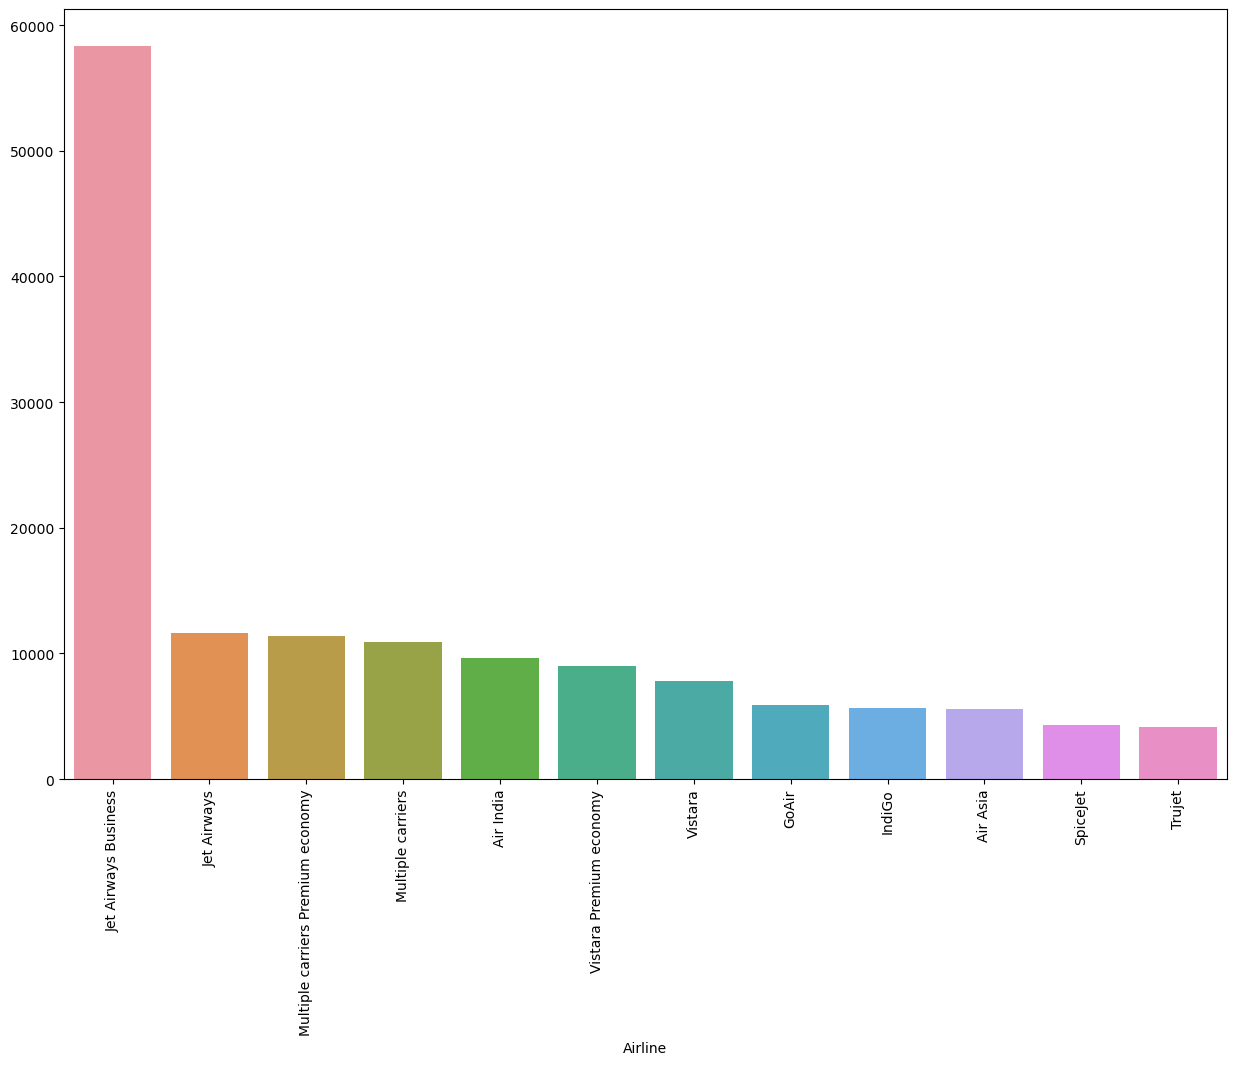

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(x = Airprices.index, y = Airprices.values)
plt.xticks(rotation=90)
plt.show()

#### Jet Airways Business has the highest price with Trujet having the lowest

### GARAPH USING BOXPLOT

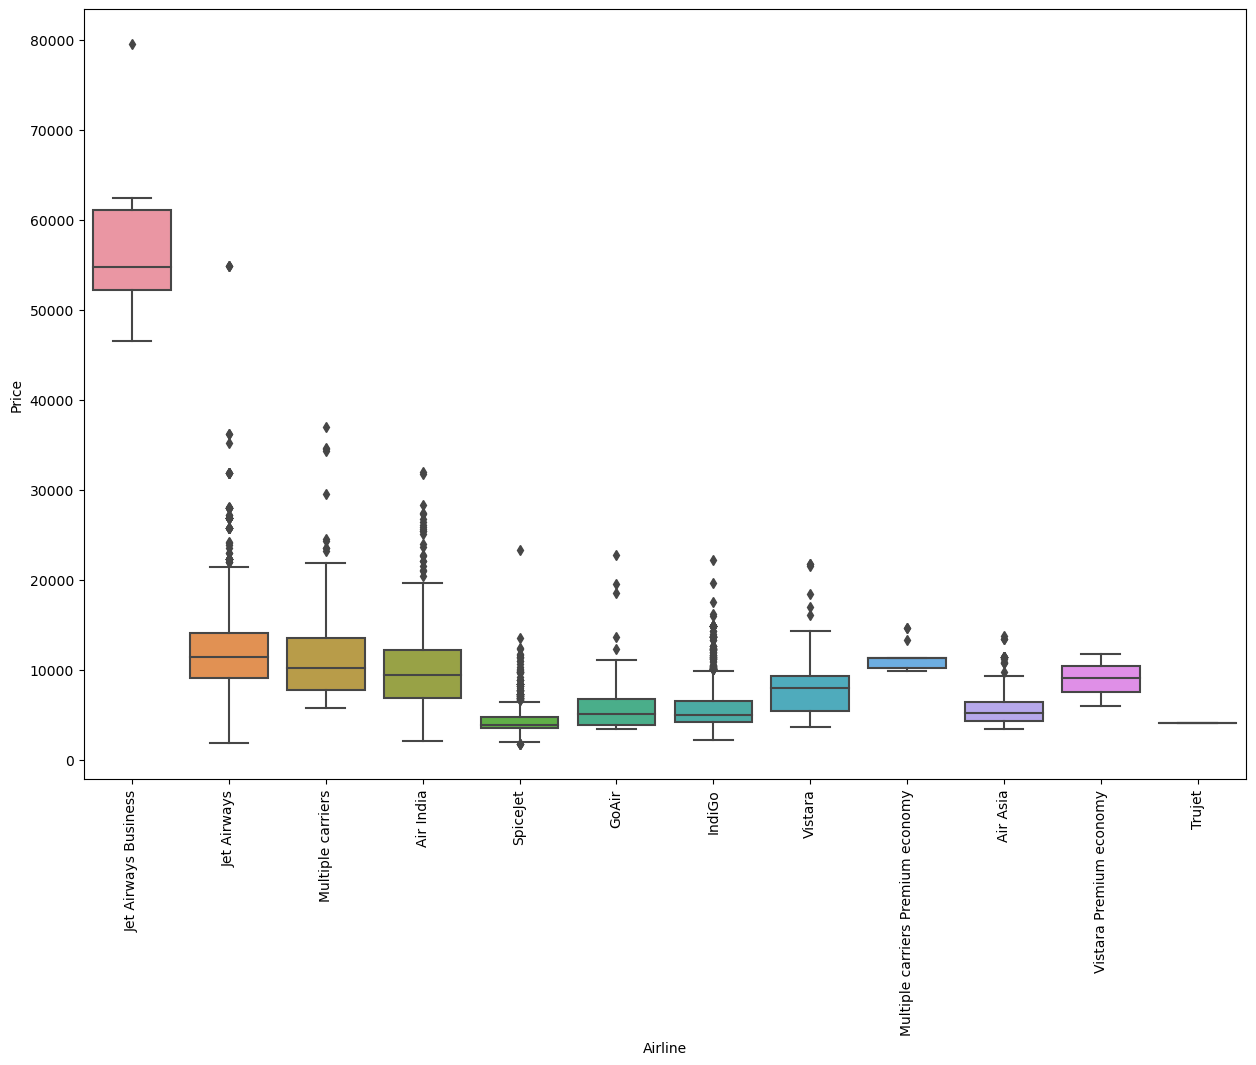

In [35]:
plt.figure(figsize=(15,10))
sns.boxplot(x ='Airline', y ='Price',data=data.sort_values('Price', ascending=False))
plt.xticks(rotation=90)
plt.show()

### PRICE BASED ON THE NUMBER OF STOPS

In [36]:
data.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

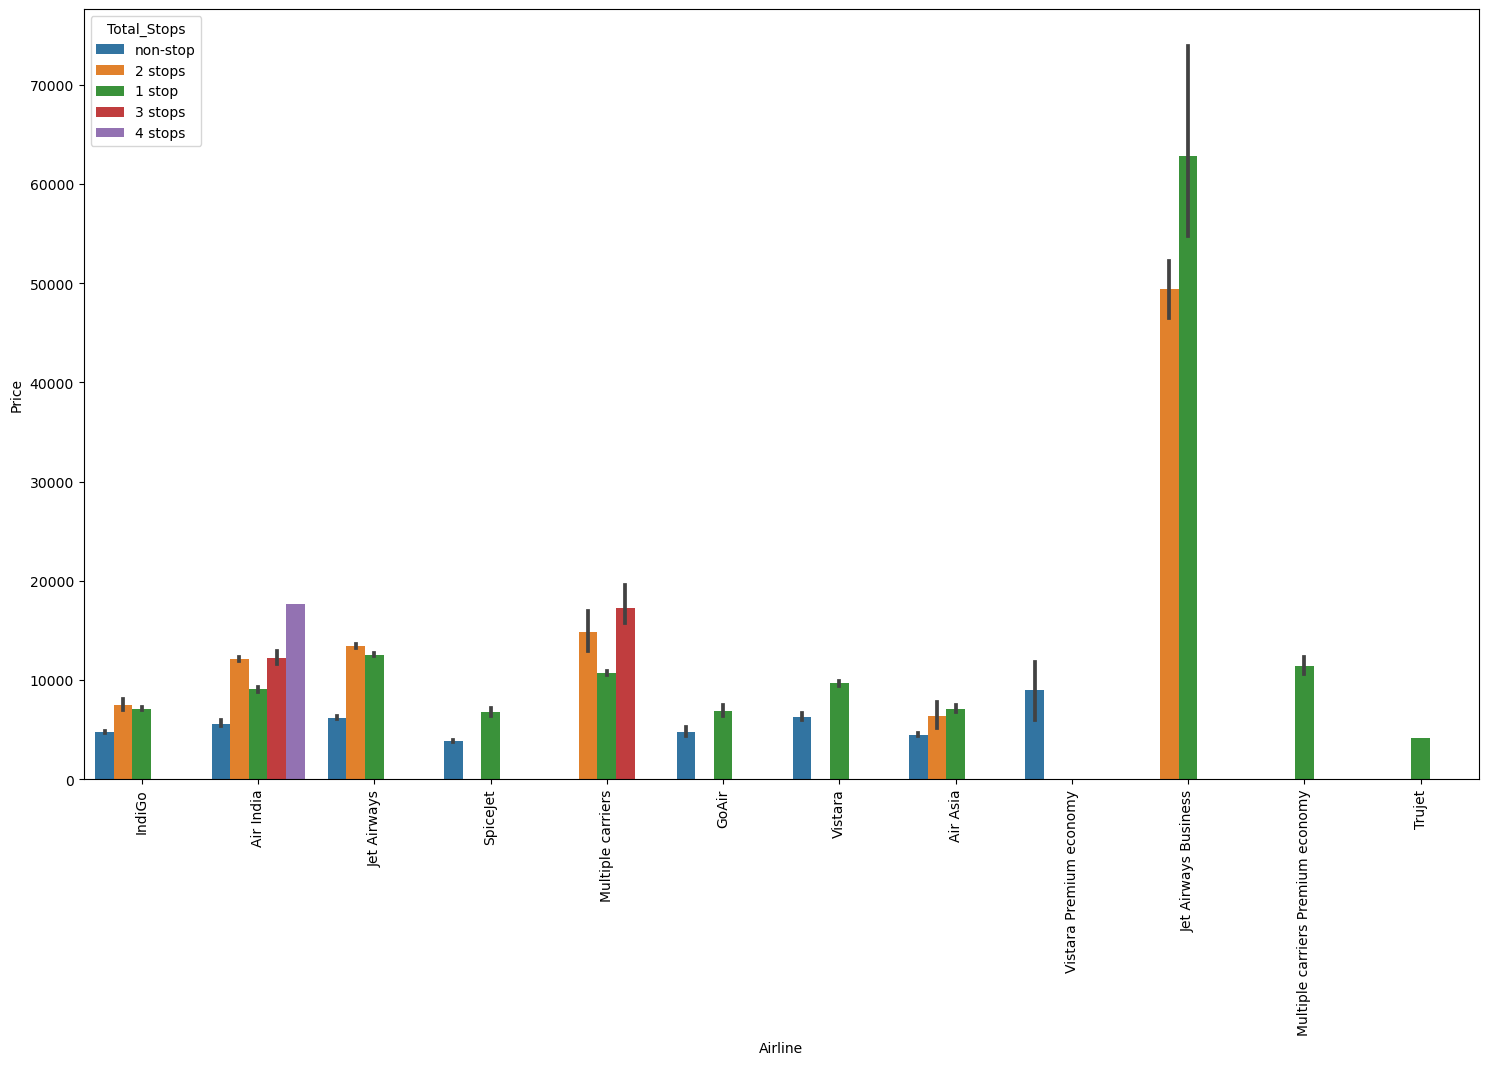

In [37]:
plt.figure(figsize=(18,10))
sns.barplot(x=data['Airline'],y=data['Price'],hue=data['Total_Stops'])
plt.xticks(rotation=90)
plt.show()

#### One stop and two stop Jet Airways Business is having the highest price

### SOURCES

In [38]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### SOURCES VS PRICE

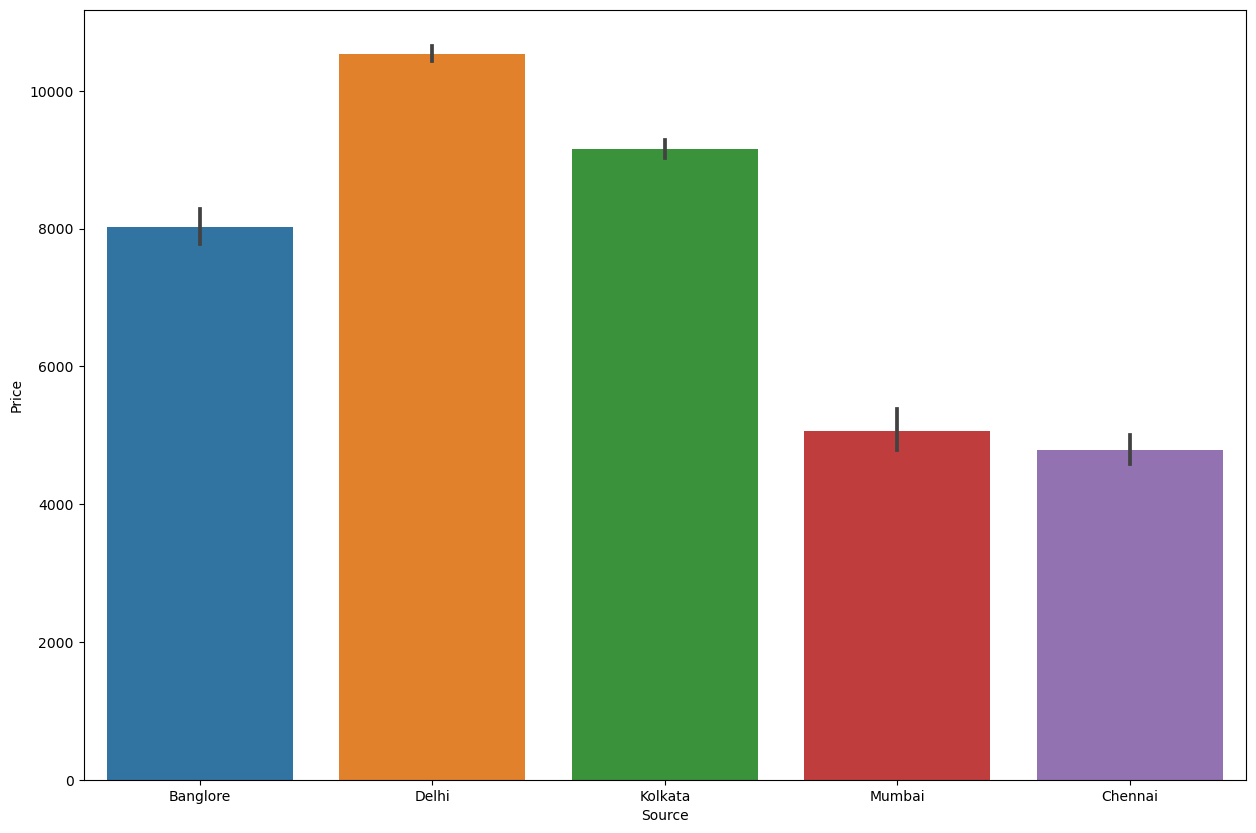

In [39]:
plt.figure(figsize=(15,10))
sns.barplot(x='Source',y='Price',data = data.sort_values('Price',ascending=False))
plt.show()

### DESTINATION

In [40]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

### SOURCES VS DESTINATION

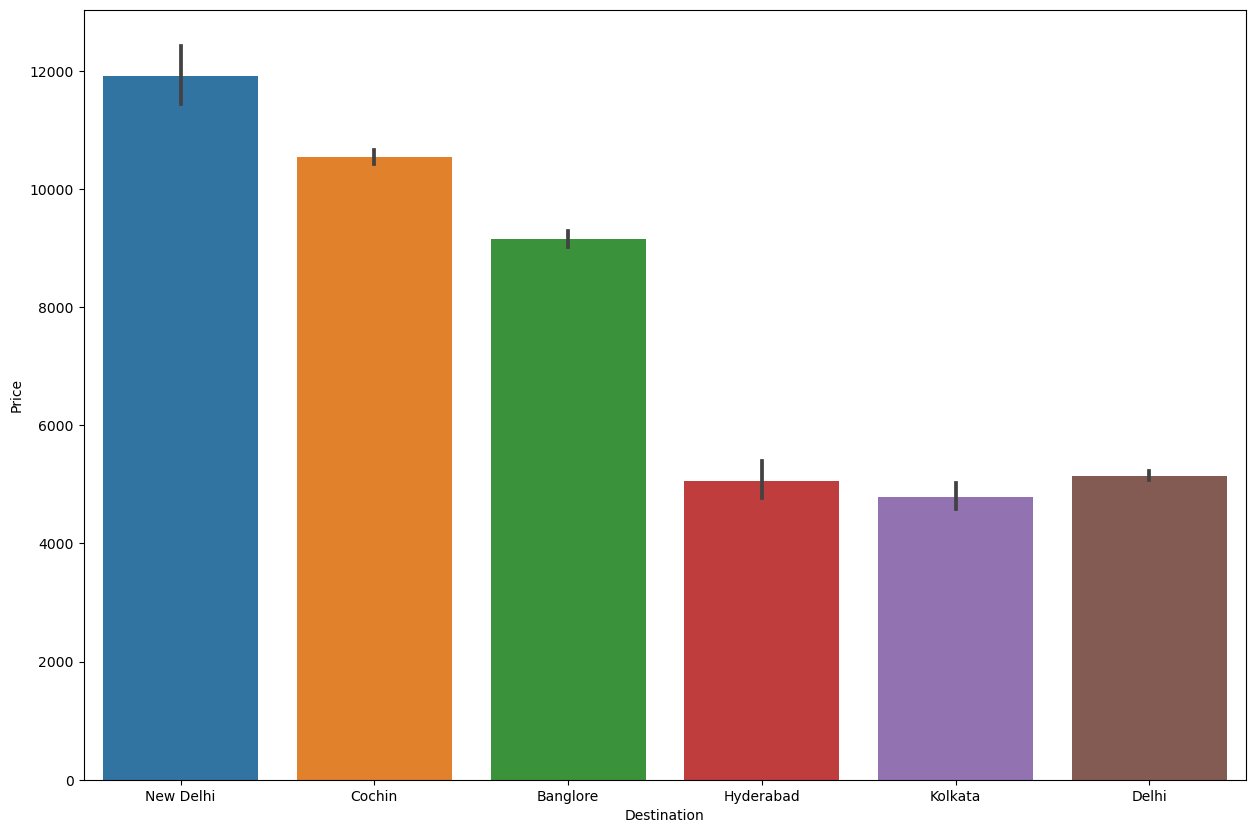

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(x='Destination',y='Price',data = data.sort_values('Price',ascending=False))
plt.show()

### HERE WE REPLACE NEW DELHI WITH DELHI AND THEN PLOT THE NEW GRAPH (SOURCE VS DESTINATION)

In [42]:
for i in data:
    data.replace('New Delhi','Delhi',inplace=True)

In [43]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [44]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

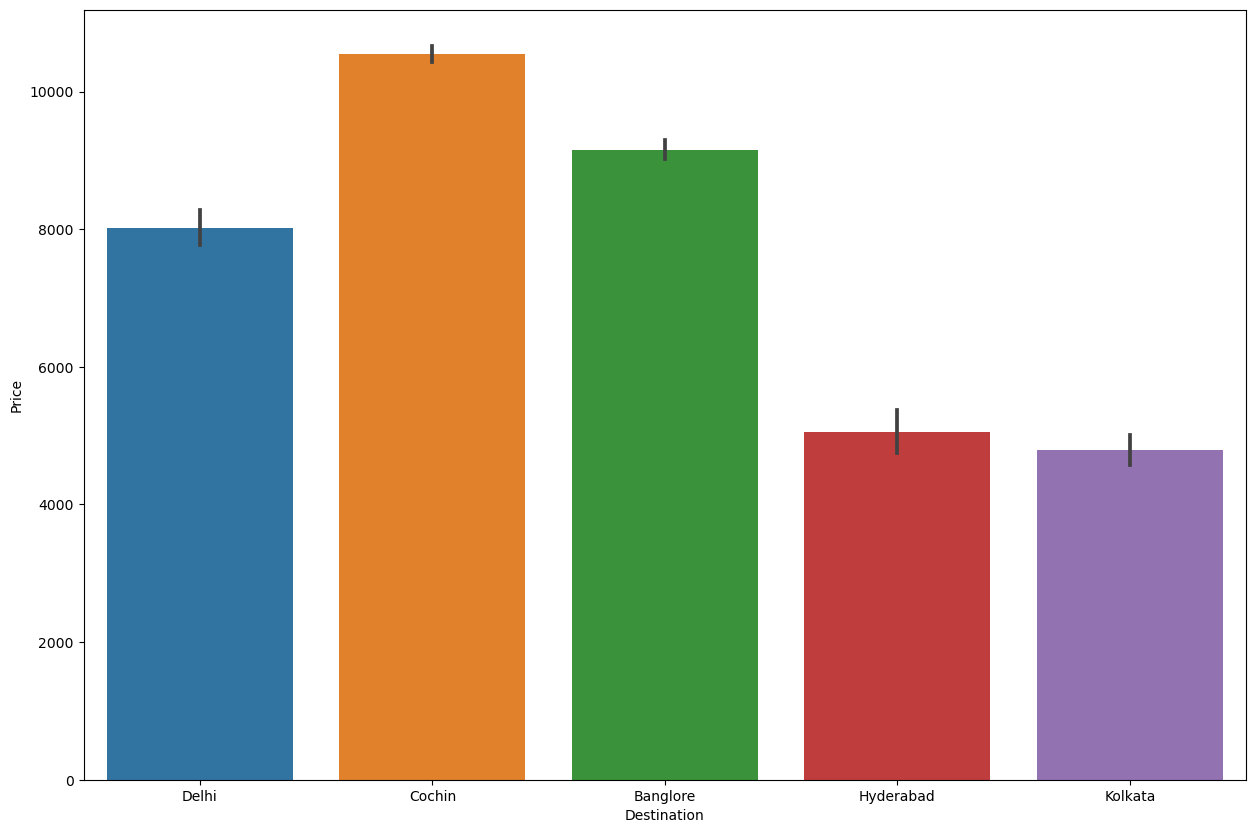

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(x='Destination',y='Price',data = data.sort_values('Price',ascending=False))
plt.show()

### HEATMAP

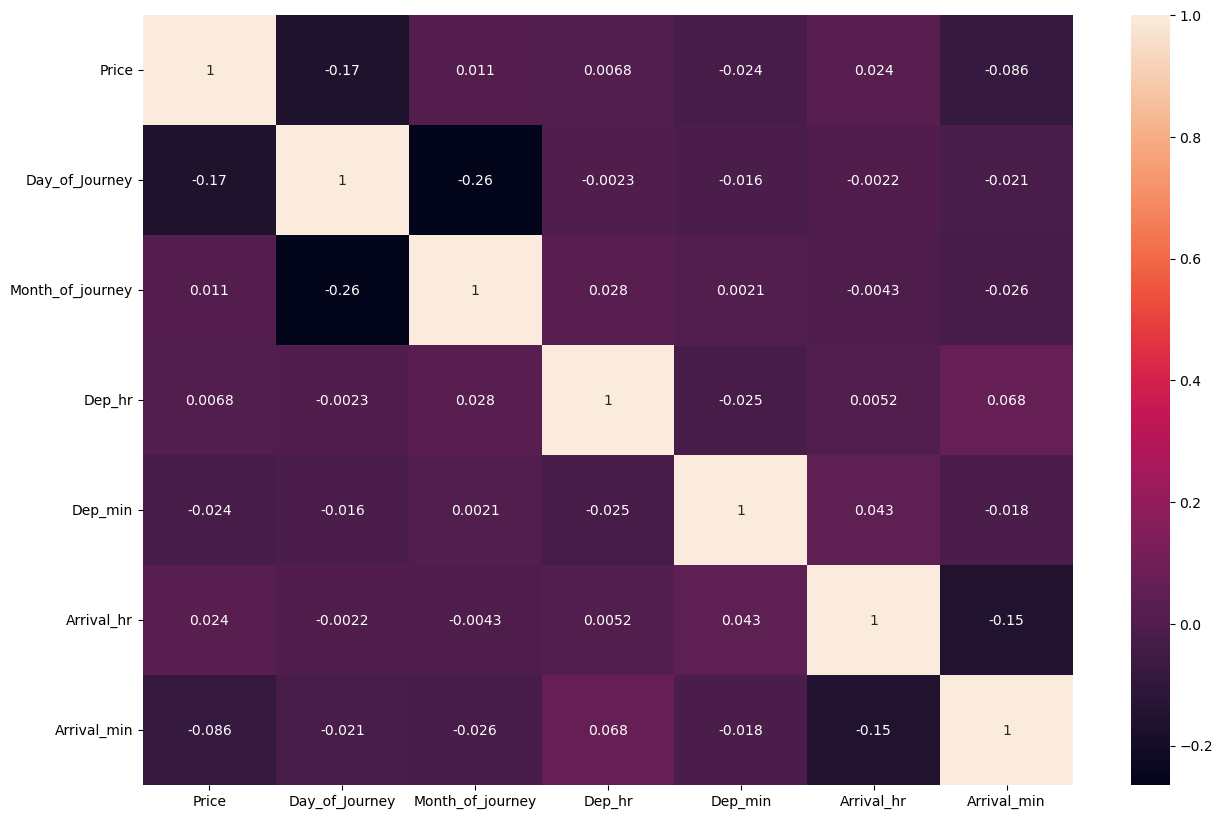

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### The features are less correlated which is a good thing for us to avoid Multicollinearity

### APPLY ONEHOT ENCODING ON THE CATEGORICAL VARIBLES

In [47]:
#Handling Categorical Values 
# data['Total_Stops']=data['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
# **************************************OR********************************************************************
data['Total_Stops'] = data['Total_Stops'].replace({'non-stop':'0','2 stops':'2','1 stop':'1','3 stops':'3','4 stops':'4'})




air_dummy=pd.get_dummies(data['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(data[['Source','Destination']],drop_first=True)
data=pd.concat([air_dummy,source_dest_dummy,data],axis=1)

In [48]:
data.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_journey',
       'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'duration_hr',
       'duration_min'],
      dtype='object')

In [49]:
data.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25


In [50]:
data.shape

(10682, 34)

In [51]:
data.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [52]:
data.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25


In [53]:
data.shape

(10682, 31)

# TEST DATASET

In [54]:
df_test = pd.read_excel(r"C:\Users\HP\Downloads\Test_set.xlsx")

In [55]:
df_test 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [56]:
df_test.shape

(2671, 10)

## Let's Perform that same steps as we did for training data earlier.

In [57]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [58]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [59]:
print('train_shape',data.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


### NOW SPLITING THE DATASET INTO TARGET AND DEPENDENT VARIABLE

In [60]:
data.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25


In [61]:
df_test.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Destination_New Delhi,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,dur_hr,dur_min
0,0,0,0,1,0,0,0,0,0,0,...,0,1,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,...,0,1,5,12,6,20,10,20,4,00


In [62]:
data.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [63]:
x = data.drop(['Route','Price','Additional_Info'],axis=1)

In [64]:
x.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25


In [65]:
y = data['Price']

In [66]:
y = pd.DataFrame(y)

In [67]:
y.head(2)

,Price
0,3897
1,7662


# MODEL BUILDING

#### SPILITING OUR DATASET FOR TRAINING AND TESTING

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=12,test_size=0.20)

### EXTRA TREES REGRESSOR

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
ET_model = ExtraTreesRegressor(n_estimators=120)
ET_model.fit(x_train,y_train)

ET_y_pred = ET_model.predict(x_test)

In [70]:
ET_y_pred

array([ 4753.43333333, 12870.525     , 10470.52916667, ...,
        6808.19166667,  6668.93333333,  8355.        ])

In [71]:
from sklearn.metrics import r2_score
acc_ET= r2_score(y_test,ET_y_pred)
print("The accuracy score of this model is---> ",acc_ET)

The accuracy score of this model is--->  0.7707259593092022


### RANDOM FOREST REGRESSOR

In [72]:
from sklearn.ensemble import RandomForestRegressor
RT_model = RandomForestRegressor()
RT_model.fit(x_train,y_train)
RT_y_pred = RT_model.predict(x_test)

In [73]:
RT_y_pred

array([ 4965.5       , 12828.52      , 10281.80016667, ...,
        6769.88      ,  7402.81      ,  8188.589     ])

In [74]:
acc_RT= r2_score(y_test,RT_y_pred)
print("The accuracy score of this model is---> ",acc_RT)

The accuracy score of this model is--->  0.7338649788786151


## HYPERPARAMETER

In [75]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(start=80 ,stop=1500 ,num=10)]
max_features = ['auto','sqrt']
max_depth=[int(x) for x in np.linspace(6,55,num=5)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

# create random grid

rand_grid={'n_estimators':n_estimators,
          'max_features':max_features,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'min_samples_leaf':min_samples_leaf}

rf = RandomForestRegressor()

rCV = RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',
                         n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [76]:
rCV 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 18, 30, 42, 55],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [77]:
rCV.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 18, 30, 42, 55],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [78]:
rCV_y_pred = rCV.predict(x_test)

In [79]:
rCV_y_pred

array([ 4955.13335859, 12322.49778048, 10930.93830662, ...,
        7757.36124878,  8319.08520796,  8426.25828396])

In [80]:
acc_rCV = r2_score(y_test,rCV_y_pred)
print('The accuracy score of Random SearchCV is-->',acc_rCV)

The accuracy score of Random SearchCV is--> 0.7853171633708151


### CATBOOST REGRESSOR

In [81]:
! pip install catboost

In [82]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor()
cat_model.fit(x_train,y_train)

Learning rate set to 0.057463
0:	learn: 4444.5084537	total: 301ms	remaining: 5m
1:	learn: 4291.2845327	total: 304ms	remaining: 2m 31s
2:	learn: 4140.5719717	total: 306ms	remaining: 1m 41s
3:	learn: 4002.8489354	total: 309ms	remaining: 1m 16s
4:	learn: 3883.2509897	total: 311ms	remaining: 1m 1s
5:	learn: 3763.4458093	total: 314ms	remaining: 52s
6:	learn: 3652.8537477	total: 317ms	remaining: 45s
7:	learn: 3560.7641704	total: 320ms	remaining: 39.7s
8:	learn: 3474.5685793	total: 323ms	remaining: 35.6s
9:	learn: 3385.1036384	total: 326ms	remaining: 32.3s
10:	learn: 3306.7149251	total: 329ms	remaining: 29.6s
11:	learn: 3232.2692271	total: 332ms	remaining: 27.3s
12:	learn: 3163.9296972	total: 335ms	remaining: 25.4s
13:	learn: 3101.1035427	total: 337ms	remaining: 23.8s
14:	learn: 3045.9633087	total: 340ms	remaining: 22.3s
15:	learn: 2999.0925139	total: 342ms	remaining: 21s
16:	learn: 2948.2255328	total: 345ms	remaining: 20s
17:	learn: 2900.4019876	total: 348ms	remaining: 19s
18:	learn: 2857.94

181:	learn: 1911.4860184	total: 880ms	remaining: 3.95s
182:	learn: 1909.5678989	total: 884ms	remaining: 3.94s
183:	learn: 1908.2935029	total: 887ms	remaining: 3.93s
184:	learn: 1907.1709025	total: 890ms	remaining: 3.92s
185:	learn: 1904.6120502	total: 893ms	remaining: 3.91s
186:	learn: 1903.2448164	total: 897ms	remaining: 3.9s
187:	learn: 1901.4873141	total: 901ms	remaining: 3.89s
188:	learn: 1900.5349108	total: 905ms	remaining: 3.88s
189:	learn: 1897.6136426	total: 909ms	remaining: 3.88s
190:	learn: 1896.4531511	total: 913ms	remaining: 3.87s
191:	learn: 1894.5213989	total: 917ms	remaining: 3.86s
192:	learn: 1893.5176128	total: 923ms	remaining: 3.86s
193:	learn: 1892.4713773	total: 926ms	remaining: 3.85s
194:	learn: 1891.6572384	total: 930ms	remaining: 3.84s
195:	learn: 1890.8111981	total: 933ms	remaining: 3.83s
196:	learn: 1889.5000132	total: 939ms	remaining: 3.83s
197:	learn: 1886.9882516	total: 942ms	remaining: 3.82s
198:	learn: 1885.1628293	total: 946ms	remaining: 3.81s
199:	learn:

358:	learn: 1694.9782318	total: 1.65s	remaining: 2.95s
359:	learn: 1694.0033041	total: 1.66s	remaining: 2.95s
360:	learn: 1693.0603026	total: 1.67s	remaining: 2.95s
361:	learn: 1691.6950956	total: 1.67s	remaining: 2.94s
362:	learn: 1690.9783053	total: 1.68s	remaining: 2.94s
363:	learn: 1690.0203067	total: 1.68s	remaining: 2.93s
364:	learn: 1689.2691046	total: 1.68s	remaining: 2.93s
365:	learn: 1688.9643963	total: 1.69s	remaining: 2.93s
366:	learn: 1687.5054683	total: 1.7s	remaining: 2.93s
367:	learn: 1686.9717353	total: 1.7s	remaining: 2.92s
368:	learn: 1685.3376858	total: 1.7s	remaining: 2.91s
369:	learn: 1685.2090516	total: 1.71s	remaining: 2.91s
370:	learn: 1684.3148863	total: 1.71s	remaining: 2.91s
371:	learn: 1682.9398956	total: 1.72s	remaining: 2.9s
372:	learn: 1681.5149821	total: 1.72s	remaining: 2.9s
373:	learn: 1680.7144253	total: 1.73s	remaining: 2.89s
374:	learn: 1680.5907783	total: 1.73s	remaining: 2.88s
375:	learn: 1680.4784623	total: 1.73s	remaining: 2.88s
376:	learn: 167

513:	learn: 1569.4605984	total: 2.24s	remaining: 2.12s
514:	learn: 1569.0966093	total: 2.24s	remaining: 2.11s
515:	learn: 1568.2168763	total: 2.25s	remaining: 2.11s
516:	learn: 1567.8107100	total: 2.25s	remaining: 2.1s
517:	learn: 1567.2058654	total: 2.25s	remaining: 2.1s
518:	learn: 1565.8619516	total: 2.26s	remaining: 2.09s
519:	learn: 1565.8503881	total: 2.26s	remaining: 2.09s
520:	learn: 1564.9610687	total: 2.27s	remaining: 2.08s
521:	learn: 1563.7733259	total: 2.27s	remaining: 2.08s
522:	learn: 1562.9820582	total: 2.27s	remaining: 2.07s
523:	learn: 1562.3530898	total: 2.28s	remaining: 2.07s
524:	learn: 1561.9302006	total: 2.28s	remaining: 2.06s
525:	learn: 1560.8802607	total: 2.29s	remaining: 2.06s
526:	learn: 1559.6679997	total: 2.29s	remaining: 2.06s
527:	learn: 1558.7603652	total: 2.3s	remaining: 2.05s
528:	learn: 1557.8337860	total: 2.3s	remaining: 2.05s
529:	learn: 1557.3569486	total: 2.31s	remaining: 2.04s
530:	learn: 1556.4725065	total: 2.31s	remaining: 2.04s
531:	learn: 15

708:	learn: 1471.7053714	total: 3s	remaining: 1.23s
709:	learn: 1470.9434881	total: 3s	remaining: 1.23s
710:	learn: 1470.5918355	total: 3.01s	remaining: 1.22s
711:	learn: 1470.5797150	total: 3.01s	remaining: 1.22s
712:	learn: 1469.3073697	total: 3.01s	remaining: 1.21s
713:	learn: 1468.6678256	total: 3.02s	remaining: 1.21s
714:	learn: 1467.6106957	total: 3.02s	remaining: 1.2s
715:	learn: 1467.1769793	total: 3.02s	remaining: 1.2s
716:	learn: 1467.0974428	total: 3.02s	remaining: 1.19s
717:	learn: 1466.7943391	total: 3.03s	remaining: 1.19s
718:	learn: 1466.6965423	total: 3.03s	remaining: 1.18s
719:	learn: 1465.8758740	total: 3.03s	remaining: 1.18s
720:	learn: 1465.4158832	total: 3.03s	remaining: 1.17s
721:	learn: 1464.6917865	total: 3.04s	remaining: 1.17s
722:	learn: 1464.4338201	total: 3.04s	remaining: 1.16s
723:	learn: 1463.9209995	total: 3.04s	remaining: 1.16s
724:	learn: 1463.9158103	total: 3.04s	remaining: 1.16s
725:	learn: 1463.8399968	total: 3.05s	remaining: 1.15s
726:	learn: 1463.6

898:	learn: 1394.6532335	total: 3.57s	remaining: 401ms
899:	learn: 1394.1376067	total: 3.57s	remaining: 397ms
900:	learn: 1393.4879974	total: 3.58s	remaining: 393ms
901:	learn: 1393.0712185	total: 3.58s	remaining: 389ms
902:	learn: 1392.6989106	total: 3.58s	remaining: 385ms
903:	learn: 1392.0870248	total: 3.59s	remaining: 381ms
904:	learn: 1391.8022306	total: 3.59s	remaining: 377ms
905:	learn: 1391.4944351	total: 3.59s	remaining: 373ms
906:	learn: 1391.1035576	total: 3.6s	remaining: 369ms
907:	learn: 1390.4954946	total: 3.6s	remaining: 365ms
908:	learn: 1390.1411033	total: 3.6s	remaining: 361ms
909:	learn: 1389.9391521	total: 3.61s	remaining: 357ms
910:	learn: 1389.8644284	total: 3.61s	remaining: 353ms
911:	learn: 1389.8622287	total: 3.61s	remaining: 348ms
912:	learn: 1389.8598590	total: 3.61s	remaining: 344ms
913:	learn: 1389.5269773	total: 3.62s	remaining: 340ms
914:	learn: 1389.2240246	total: 3.62s	remaining: 336ms
915:	learn: 1388.8584005	total: 3.62s	remaining: 332ms
916:	learn: 1

In [83]:
cat_pred = cat_model.predict(x_test)

In [84]:
cat_pred

array([ 4419.70619624, 12668.4771888 , 10127.58730057, ...,
        7377.25794599,  7867.27026791,  8696.70226717])

In [85]:
acc_cat = r2_score(y_test,cat_pred)

In [86]:
print("The accuracy score for catboost algorithm is ",acc_cat)

The accuracy score for catboost algorithm is  0.8191067928219716


### LIGHTGBM

In [87]:
! pip install lightgbm


In [88]:
x_train[['duration_hr','duration_min']]=x_train[['duration_hr','duration_min']].astype(int)
x_test[['duration_hr','duration_min']]=x_test[['duration_hr','duration_min']].astype(int)

x_train['Total_Stops']=x_train['Total_Stops'].astype(int)
x_test['Total_Stops']=x_test['Total_Stops'].astype(int)

In [89]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(x_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 24
[LightGBM] [Info] Start training from score 9086.625980


LGBMRegressor()

In [90]:
lgbm_predict = lgb_model.predict(x_test)

In [91]:
lgbm_predict

array([ 4855.68113642, 12715.79635901, 10191.2810592 , ...,
        7239.32152244,  7254.6965183 ,  9404.33156986])

In [92]:
acc_lgbm = r2_score(y_test,lgbm_predict)
print("The accuracy score for lgbm algorithm is ",acc_lgbm)

The accuracy score for lgbm algorithm is  0.7768121548747775


### XGBOOST

In [93]:
!pip install xgboost

In [94]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)
xgb_pred=xgb_model.predict(x_test)
acc_xgb=r2_score(y_test,xgb_pred)
print('The accuracy score for xgboost algorithm is--->',acc_xgb)

The accuracy score for xgboost algorithm is---> 0.8087851753575284


### So as we can see that the best here is "CatBoostRegressor" and its accuracy is higher than other algorithm.

In [95]:
#USE PICKLE TO SAVE OUR MODEL SO THAT WE CAN USE IT LATER.

import pickle
pickle.dump(cat_model,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
    

In [96]:
data_deploy = data.drop(['Additional_Info','Route'],axis=1)

In [97]:
data_deploy.to_csv('Deploy_data_pdf')